In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re

def parse_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_gpu_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time GPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_core_count( filename ):
    out_dict = {}
    n_regex = re.compile( "C=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_hybrid_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time CPU and GPU \(total time\): (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_cpu_frac( filename ):
    out_dict = {}
    n_regex = re.compile( "CPUFRAC=(\d+\.\d+)" )
    t_regex = re.compile( "Time CPU and GPU \(total time\): (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = float( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_cpu_gpu_time_frac( filename ):
    out_dict = {}
    n_regex = re.compile( "CPUFRAC=(\d+\.\d+)" )
    c_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )
    g_regex = re.compile( "Time GPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            c_found = c_regex.search( line )
            g_found = g_regex.search( line )
            if n_found:
                n = float( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
                    out_dict[ n ].append( list () )
                    out_dict[ n ].append( list () )
            elif c_found:
                time = float( c_found.group( 1 ) )
                
                if n == 0.0:
                    out_dict[ n ][ 1 ].append( 0.00 )
                else:
                    out_dict[ n ][ 1 ].append( time )
            elif g_found:
                time = float( g_found.group( 1 ) )
                if n == 1.00:
                    out_dict[ n ][ 0 ].append( 0.00 )
                else:
                    out_dict[ n ][ 0 ].append( time )
    out_dict[ 1.0 ][ 0 ] = [ 0 ] * 5
    return out_dict

def parse_cpu_imbalance( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Load imbalance: ([+-]?\d+(?:\.\d+)?)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = "Load imbalance:" in line
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( line.split( ':' )[ 1 ].strip() )
                out_dict[ n ].append( abs( time ) )
    return out_dict


N:  1000000000
N:  2000000000
N:  3000000000
N:  4000000000
N:  5000000000
{1000000000: [1.648479, 1.67644, 1.648134, 1.858499, 1.614204, 1.675532], 2000000000: [3.302317, 3.186133, 3.247264, 3.125404, 3.32394, 3.244102], 3000000000: [4.917774, 4.664787, 4.840819, 4.867389, 4.813148, 4.761134], 4000000000: [6.339725, 6.548195, 6.544226, 6.166334, 7.006205, 6.774142], 5000000000: [8.416452, 8.307911, 9.434832, 8.318536, 8.7026, 8.416097]}


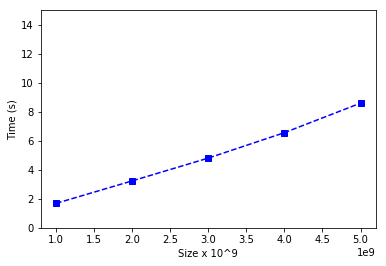

In [25]:
times = parse_runtime( 'outfile_2.tsv' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
ax.set_ylim( 0, 15 )
plt.suptitle( "")
plt.xlabel( "Size x 10^9")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 

N:  1
N:  2
N:  4
N:  8
N:  16
{1: [18.303793, 18.331407, 18.331028, 18.298071, 18.29694, 18.310826], 2: [9.50209, 9.423733, 9.466938, 9.356036, 9.393869, 9.318862], 4: [5.036041, 5.444924, 5.150116, 5.784407, 5.395327, 5.565976], 8: [2.838335, 2.823942, 2.72738, 2.813958, 2.941283, 2.775347], 16: [1.81365, 1.729895, 1.928719, 1.588934, 1.702559, 1.923143]}


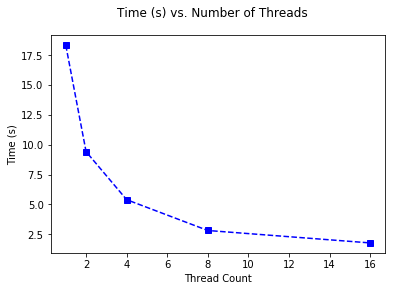

In [9]:
times = parse_core_count( 'outfile_scale.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 


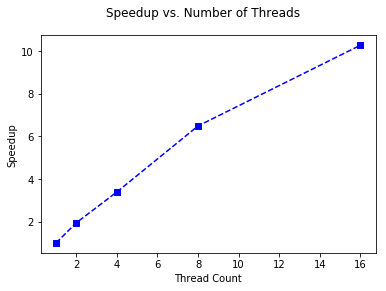

In [10]:
ax = plt.subplot()
t_0 = np.mean( times[ 1 ] )
x = list( times.keys() )
y = [ t_0 / np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Speedup vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Speedup")
ax.plot( x, y, "bs--" )

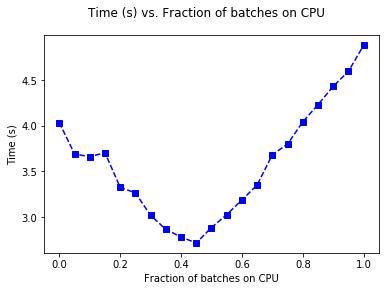

{0.0: [4.255237, 3.998292, 3.831167, 4.049007], 0.05: [3.414951, 3.971703, 3.685293], 0.1: [3.449885, 3.62951, 3.826969, 3.729008], 0.15: [3.74911, 3.830512, 3.730504, 3.505326], 0.2: [3.263455, 3.485457, 3.407743, 3.14011], 0.25: [3.178281, 3.531741, 3.389092, 2.954296], 0.3: [2.860827, 2.830336, 3.08298, 3.29434], 0.35: [2.665436, 2.782111, 3.010119, 2.997645], 0.4: [2.744983, 2.835474, 2.736945, 2.799252], 0.45: [2.590384, 2.820261, 2.604845, 2.843738], 0.5: [2.928316, 2.87164, 2.854, 2.878352], 0.55: [3.08784, 3.020556, 2.995549, 2.996593], 0.6: [3.245355, 3.066576, 3.246079, 3.18221], 0.65: [3.420428, 3.249259, 3.353585, 3.376441], 0.7: [3.726143, 3.586505, 3.900045, 3.515594], 0.75: [3.783229, 3.718542, 3.851761, 3.838796], 0.8: [4.052272, 4.028176, 4.172019, 3.915152], 0.85: [4.157992, 4.18159, 4.26433, 4.31692], 0.9: [4.464705, 4.592281, 4.363524, 4.305398], 0.95: [4.510847, 4.671768, 4.665907, 4.53312], 1.0: [4.76565, 4.801104, 4.983595, 4.974867]}


In [2]:
times = parse_cpu_frac( 'cpu_out.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Fraction of batches on CPU")
plt.xlabel( "Fraction of batches on CPU")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
plt.show()
print( times) 

{0.0: [0.987108, 0.99799, 0.987207, 0.997871], 0.05: [0.888077, 0.890573, 0.877576], 0.1: [0.788433, 0.80435, 0.819594, 0.817241], 0.15: [0.739738, 0.742556, 0.739931, 0.724066], 0.2: [0.607453, 0.642687, 0.645849, 0.617806], 0.25: [0.50589, 0.570424, 0.516552, 0.483973], 0.3: [0.407967, 0.336949, 0.409371, 0.422139], 0.35: [0.233294, 0.266182, 0.310018, 0.294215], 0.4: [0.089756, 0.122621, 0.096917, 0.160373], 0.45: [0.132699, 0.052577, 0.027209, 0.038115], 0.5: [0.121871, 0.064184, 0.16042, 0.207446], 0.55: [0.36181, 0.326982, 0.244721, 0.286568], 0.6: [0.351856, 0.40144, 0.380884, 0.361644], 0.65: [0.46233, 0.472807, 0.503035, 0.537676], 0.7: [0.65189, 0.607148, 0.670603, 0.604212], 0.75: [0.661194, 0.639425, 0.686301, 0.699308], 0.8: [0.759271, 0.721258, 0.765846, 0.717967], 0.85: [0.809034, 0.828669, 0.806754, 0.81963], 0.9: [0.884674, 0.863352, 0.866085, 0.856366], 0.95: [0.922934, 0.924652, 0.937679, 0.928263], 1.0: [4008615.375282, 3979039.758799, 3833359.518202, 3840110.409858

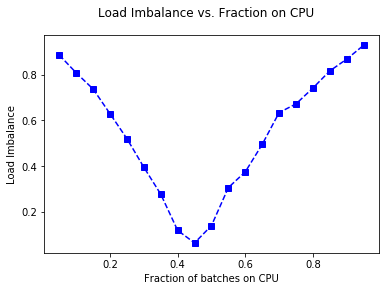

In [7]:
times = parse_cpu_imbalance( 'cpu_out.txt' )
ax = plt.subplot()

x = list( times.keys() )[ 1:-1 ]
y = [ np.mean( [ abs( item ) for item in times[ value ] ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Load Imbalance vs. Fraction on CPU")
plt.xlabel( "Fraction of batches on CPU")
plt.ylabel( "Load Imbalance")
ax.plot( x, y, "bs--" )
print( times) 

1.9498234389454987


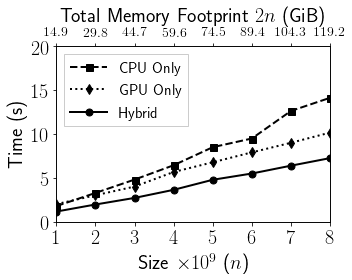

In [3]:
times_cpu = parse_runtime( 'cpu_only_out.txt' )
times_gpu = parse_gpu_runtime( 'gpu_only_out.txt' )
times_hybrid = parse_hybrid_runtime( 'hybrid_out.txt' )
size_GiB_2n = np.arange( 14.901, 120, 14.9012 )
fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny() 

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x = list( [ item // 1000000000 for item in times_cpu.keys() ] )
y = [ np.mean( times_cpu[ value * 1000000000 ] ) for value in x ]

x_gpu = list( sorted( [ item // 1000000000 for item in times_gpu.keys() ] )[ :-1 ] )
y_gpu = [ np.mean( times_gpu[ value * 1000000000 ] ) for value in x ]

#x_hybrid = list( sorted( [ item // 1000000000 for item in times_hybrid.keys() ] )[ :-1 ] )\
x_hybrid = size_GiB_2n
y_hybrid = [ np.mean( times_hybrid[ value * 1000000000 ] ) for value in x ]
lab1 = ax1.plot( x, y, ls = 'dashed', c = 'black', marker = 's', markersize = 7, linewidth = 2, label = "CPU Only")
lab2 = ax1.plot( x_gpu, y_gpu, ls = 'dotted', c = 'black', marker = 'd', markersize = 7, linewidth = 2, label = "GPU Only")
lab3 = ax2.plot( x_hybrid, y_hybrid, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

print( np.mean( times_cpu[ 8000000000 ] ) / np.mean( times_hybrid[ 8000000000 ]) )
ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Time (s)', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 + lab2 + lab3

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 20 )
ax1.set_xlim( 1, 8 )

#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_time_multiway.pdf', bbox_inches = 'tight' )

#plt.suptitle( "")
#plt.xlabel( "Size x 10^9")
#plt.ylabel( "Time (s)")
#ax.plot( x, y, "bs--", x_gpu, y_gpu, 'g^' )
#print( times) 

1 , [0.179318, 0.22504, 0.103111, 0.159268, 0.09956]
2 , [0.064924, 0.065615, 0.047165, 0.01456, 0.132174]
3 , [0.050001, 0.012042, 0.144244, 0.073415, 0.009467]
4 , [0.001697, 0.077703, 0.005969, 0.122157, 0.020153]
5 , [0.009488, 0.174628, 0.176873, 0.0091, 0.179774]
6 , [0.175346, 0.040323, 0.01264, 0.02578, 0.130572]
7 , [0.01567, 0.022494, 0.130634, 0.095961, 0.054386]
8 , [0.186817, 0.012293, 0.152856, 0.030701, 0.158628]
9 , [0.095329, 0.095474, 0.144672, 0.177326, 0.064284]


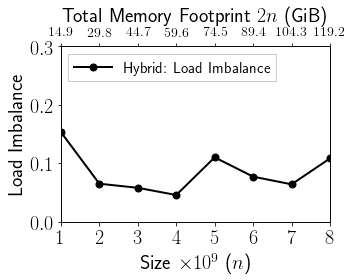

In [85]:
times_hybrid = parse_cpu_imbalance( 'hybrid_out.txt' )

for key, value in times_hybrid.items():
    print( key // 1000000000, ",", value ) 
fig = plt.figure( figsize= ( 5, 4 ) ) 

ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny()

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x = list( [ item // 1000000000 for item in times_hybrid.keys() ] )
y = [ np.mean( times_hybrid[ value * 1000000000 ] ) for value in x ]

size_GiB_2n = np.arange( 14.901, 120, 14.9012 )
x_hybrid = size_GiB_2n
y_hybrid = [ np.mean( times_hybrid[ value * 1000000000 ] ) for value in x ]
lab1 = ax1.plot( x, y, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid: Load Imbalance")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Load Imbalance', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 0.3 )
ax1.set_xlim( 1, 8 )


#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_load_imbalance_multiway.pdf', bbox_inches = 'tight' )

Saving figure: time_vs_cpu_frac_predecessor.pdf


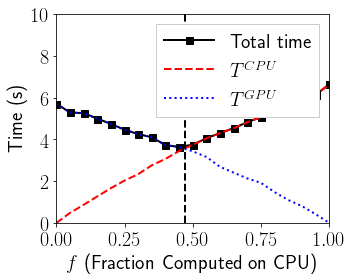

In [93]:
times = parse_cpu_gpu_time_frac( 'cpu_frac_out.txt' )
hybrid_times = parse_cpu_frac( 'cpu_frac_out.txt' )

fracs = sorted( list( times.keys() ) )
frac_cpu = fracs
time_hybrid = [ np.mean( hybrid_times[ item ] ) for item in hybrid_times ]
time_gpu_end = list()
for item in fracs:
    time_gpu_end.append( np.mean( times[ item ][ 0 ] ) )
time_cpu_end = list()
for item in fracs:
    time_cpu_end.append( np.mean( times[ item ][ 1 ] ) )

fig = plt.figure( figsize = ( 5, 4) )
ax1 = fig.add_subplot( 111 )

ax1.tick_params( which = 'major', labelsize = 20 )

lab1=ax1.plot(frac_cpu, np.asfarray( time_hybrid ), ls='solid',   c='black', marker='s', markersize=7, linewidth=2, label="Total time")
lab1=ax1.plot(frac_cpu, np.asfarray( time_cpu_end ), ls='dashed',   c='red', marker='None', markersize=7, linewidth=2, label="$T^{CPU}$")
lab1=ax1.plot(frac_cpu, np.asfarray( time_gpu_end ), ls='dotted',   c='blue', marker='None', markersize=7, linewidth=2, label="$T^{GPU}$")

model_f = 0.47
plt.axvline( x = model_f, linewidth = 2, color = 'black', linestyle = 'dashed')

ax1.set_xlabel( '$f$ (Fraction Computed on CPU)', fontsize = 20 )
ax1.set_ylabel( 'Time (s)', fontsize = 20 )

l=ax1.legend(fontsize=20, loc='upper right', fancybox=False, framealpha=1, handlelength=2.5, ncol=1)


ax1.set_ylim(0,10)
ax1.set_xlim(0,1)

# ax2.set_xlim(22.351,111.76)


plt.tight_layout()
print( "Saving figure: time_vs_cpu_frac_predecessor.pdf" )
fig.savefig("time_vs_cpu_frac_multiway.pdf", bbox_inches='tight')

